# Data Reduction in Python

We are going to use a dataset related to the 5 personality traits, for which there are 10 variables explaining each trait. These variables have a value between 1 to 5 as their scale.

Therefore, in this dataset, there are 50 variables that explain the 5 personality traits which are extraversion, neuroticism, agreeableness, conscientiousness, and openness to experience.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns

%matplotlib inline

from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('data/b5.csv')

Let's take a look inside the dataset:

In [3]:
data.head(3)

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,4,2,5,2,5,1,4,3,5,1,...,4,1,3,1,5,1,4,2,5,5
1,2,2,3,3,3,3,1,5,1,5,...,3,3,3,3,2,3,3,1,3,2
2,5,1,1,4,5,1,1,5,5,1,...,4,5,5,1,5,1,5,5,5,5


Text(0,0.5,'Value in the scale of one-to-five')

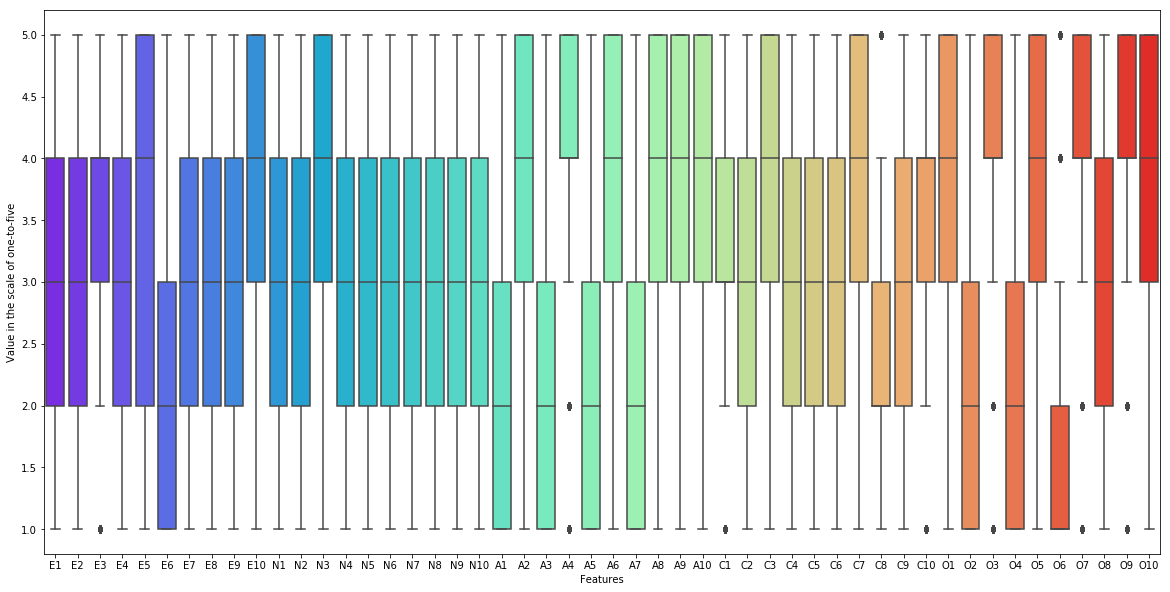

In [4]:
plt.figure(figsize=(20,10))
boxplot=sns.boxplot(data=data,palette='rainbow')
boxplot.set_xlabel('Features')
boxplot.set_ylabel('Value in the scale of one-to-five')

Here you can see that the variables all range from one to five, and the medians bounce around two, three, and four.

## Convert data to numpy array

In [5]:
X = data.values

## Scale the values

In [6]:
X = scale(X)

/home/mahsa/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


## Analysis

### PCA with 50 components

We start with 50 components which is the number of the features in the data set.

In [7]:
pca = PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Let's see how much of the total variance each component explains.

In [8]:
pca50_labels = []
for i in range(1,51):
    pca50_labels.append('PCA'+ str(i))

[Text(0,0.5,'Features'), Text(0.5,0,'Explained Variance Ratio')]

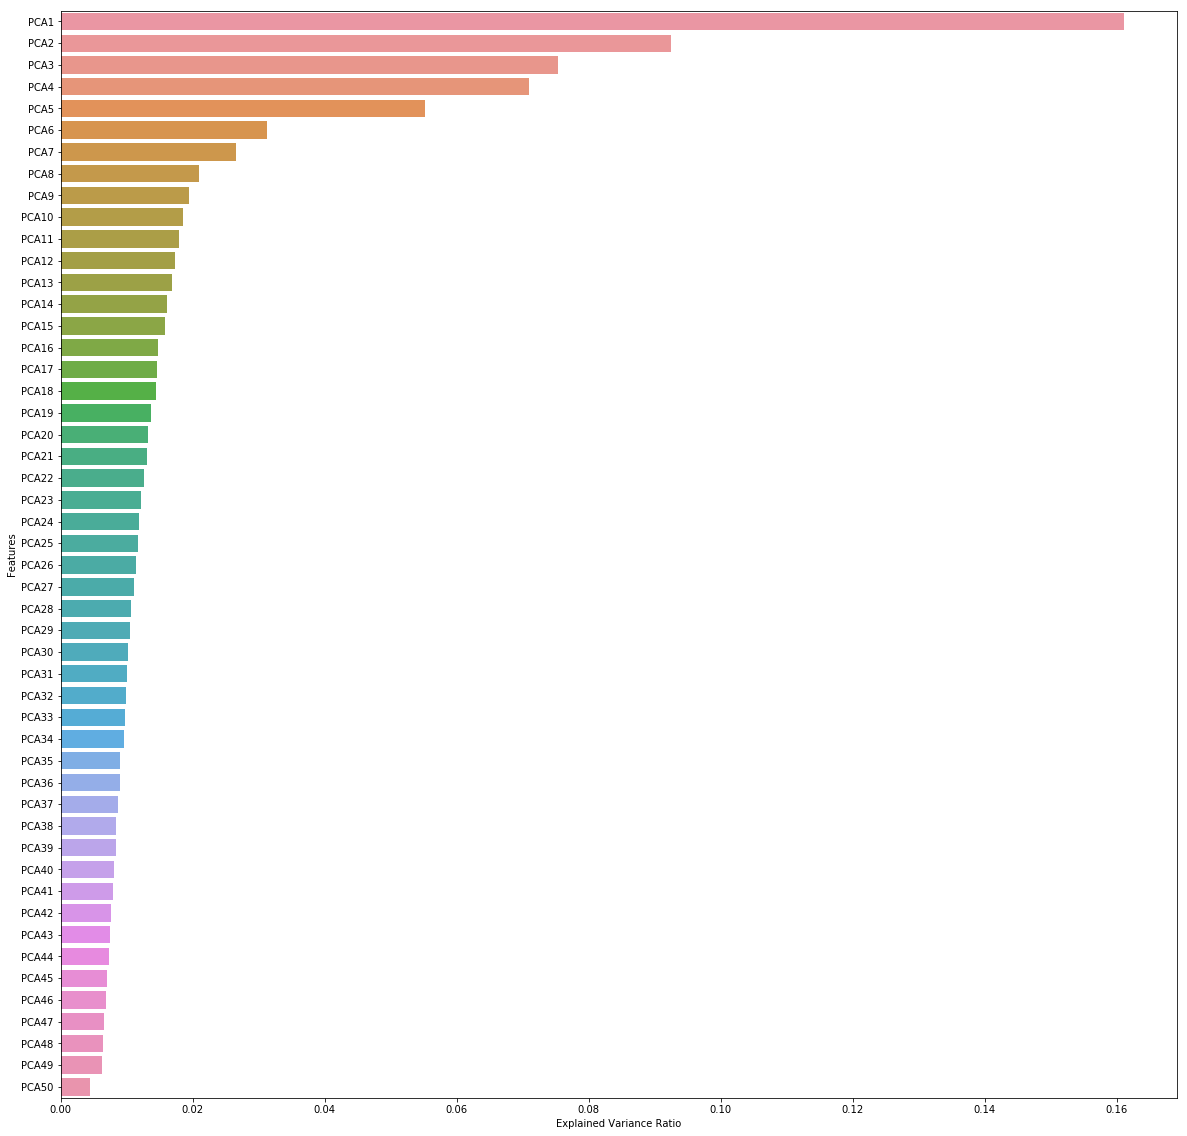

In [9]:
plt.figure(figsize=(20,20))
barplot = sns.barplot(x=pca.explained_variance_ratio_, y=pca50_labels)
barplot.set(xlabel= 'Explained Variance Ratio', ylabel= 'Features')

from here we can see that the first 10 components explain near 59% of the variance, and the rest of the components after that have little contribution to the variance:

In [10]:
explained_var = pca.explained_variance_ratio_
np.sum(explained_var[:11])

0.5897316248975062

Let's also take a look at the cumulative variance explains:

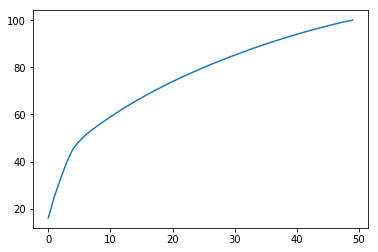

In [11]:
cumulative_explained_var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

var_plot = plt.plot(cumulative_explained_var)

In [12]:
pca10_labels = []
for i in range(1,11):
    pca10_labels.append('PCA'+ str(i))

## PCA with 10 components 

Let's do the PCA with 10 components and see the results:

In [27]:
pca10 = PCA(n_components = 10)
pca10.fit(X)
pca10_components = pca10.components_
principal_df = pd.DataFrame(pca10_components, index = pca10_labels, columns= data.columns )

[Text(0,0.5,'PCA components'), Text(0.5,0,'Explained Variance Ratio')]

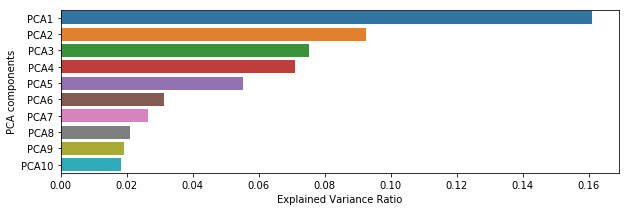

In [28]:
plt.figure(figsize=(10,3))
barplot10 = sns.barplot(x=pca10.explained_variance_ratio_, y=pca10_labels)
barplot10.set(xlabel= 'Explained Variance Ratio', ylabel= 'PCA components')

In [29]:
pca10.explained_variance_ratio_.sum()

0.5714048913040929

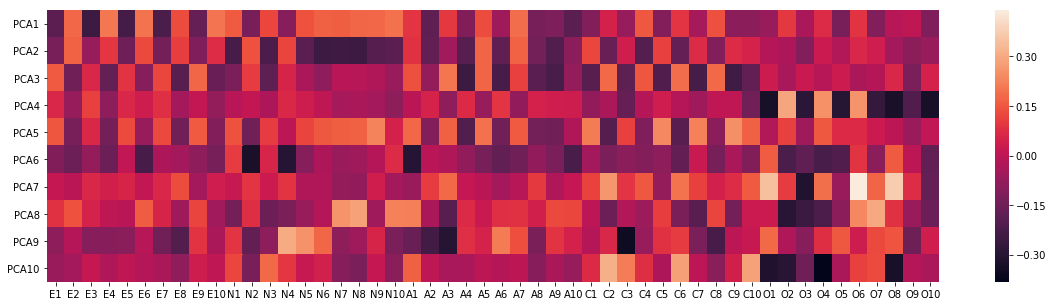

In [32]:
plt.figure(figsize=(20,5))
sns.heatmap(principal_df)

## Varimax rotation 
we apply the Virmax rotation to better interpret the components. A Varimax rotation is a change of coordinates used in principal component analysis (PCA) that maximizes the sum of the ariances of the squared loadings. Thus, all the coefficients (squared correlation with factors) will be either large or near zero, with few intermediate values.

In [18]:
def varimax(Phi, gamma = 1, q = 20, tol = 1e-6):
    from numpy import eye, asarray, dot, sum, diag
    from numpy.linalg import svd
    p,k = Phi.shape
    R = eye(k)
    d=0
    for i in range(q):
        d_old = d
        Lambda = dot(Phi, R)
        u,s,vh = svd(dot(Phi.T,asarray(Lambda)**3 - (gamma/p) * dot(Lambda, diag(diag(dot(Lambda.T,Lambda))))))
        R = dot(u,vh)
        d = sum(s)
        if d/d_old < tol: break
    return dot(Phi, R)

In [19]:
pca_components_varimax = pd.DataFrame(varimax(pca10_components), columns= pca10_labels)
pca_components_varimax.head()

/home/mahsa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  del sys.path[0]


,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10
0,-7.347223,0.579132,-0.347416,1.741504,-0.106187,0.979973,-0.369485,0.515788,-0.501378,0.195760
1,1.908755,1.378932,-3.561567,2.217081,0.937646,2.043905,0.394718,-0.192348,-0.322083,-0.591051
2,-0.774074,-0.756589,-1.624064,-2.615308,4.739024,-3.557631,-1.339079,0.275551,0.970721,-1.207358
3,3.595543,-0.662775,0.624464,-1.894162,-0.552849,-2.896781,-0.870274,0.442514,-0.885457,-0.091499
4,-0.517341,-2.361139,-0.899458,1.030076,-0.213951,1.230133,-0.459609,2.520159,-1.310182,1.076656


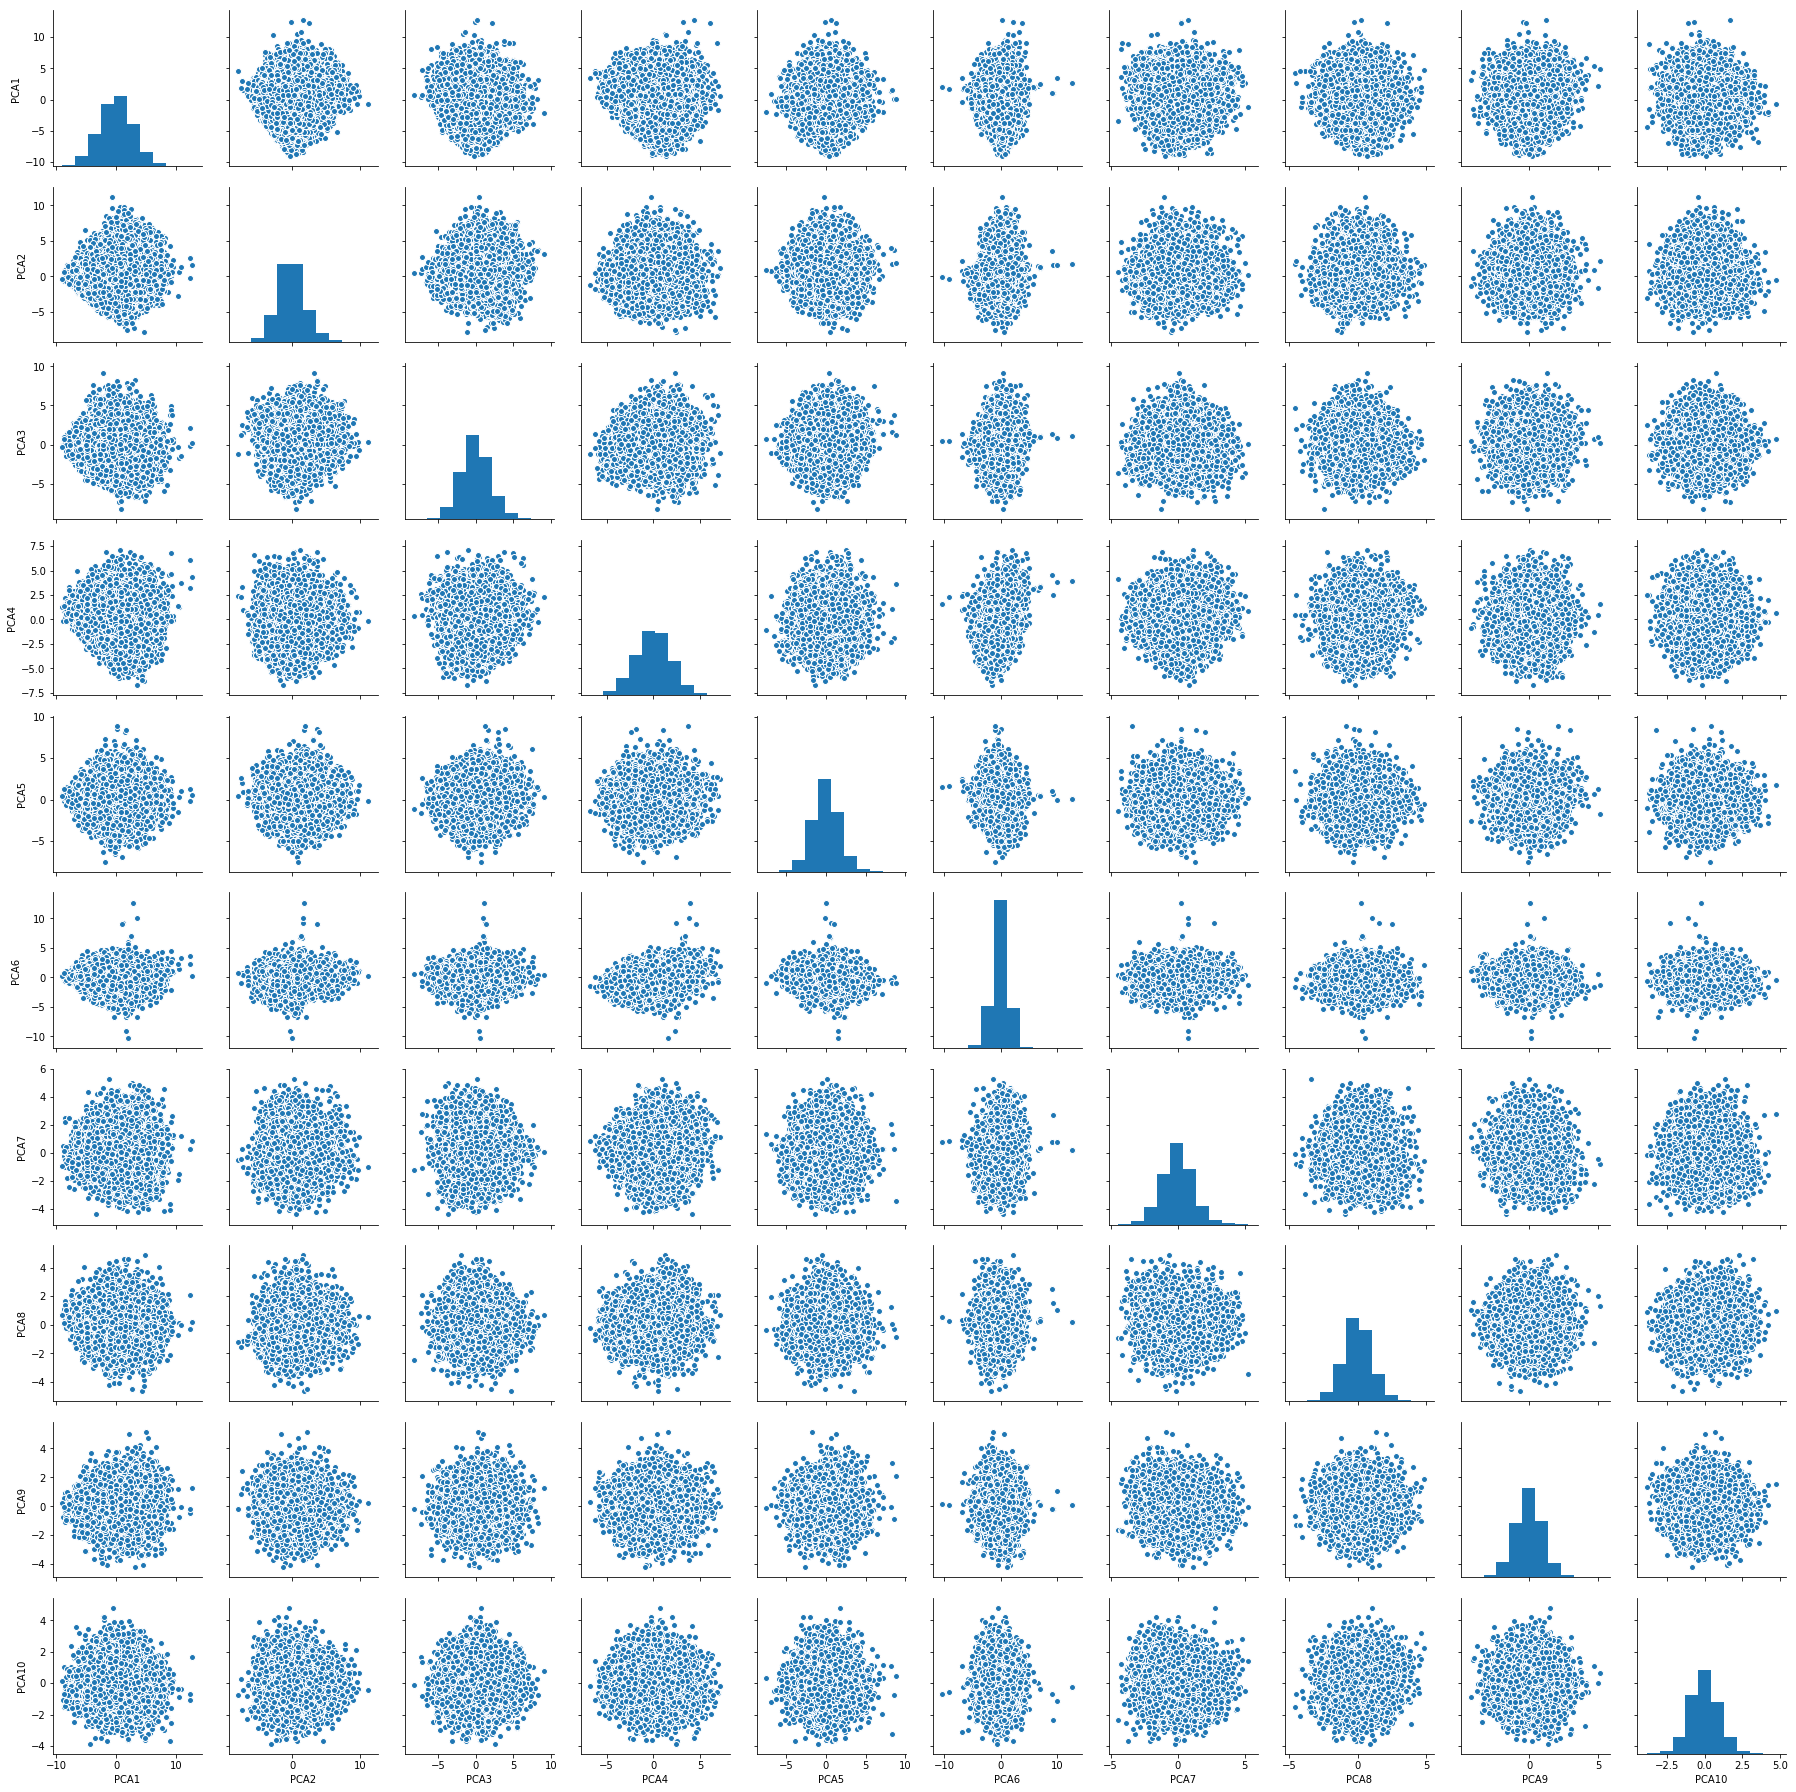

In [20]:
sns.pairplot(pca_components_varimax)

## Clustering based on PCA components

In [21]:
kmeans = KMeans(n_clusters = 5, random_state=101)

In [22]:
kmeans.fit(pca_components_varimax)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=101, tol=0.0001, verbose=0)

In [23]:
kmeans.labels_

array([3, 0, 2, ..., 2, 2, 2], dtype=int32)

In [24]:
kmeans.cluster_centers_

array([[ 2.48203236e+00, -1.32658708e-01, -1.03710559e+00,
         1.47063970e+00, -3.75624913e-02,  4.12898690e-01,
         2.59713264e-02,  2.25783482e-01,  6.09727494e-02,
         7.41320204e-03],
       [ 1.40782643e+00,  3.29713671e+00,  1.20034627e+00,
        -5.41508435e-03,  7.43166732e-02,  3.64314617e-01,
        -8.13788131e-02, -1.50161466e-02, -6.70313760e-03,
         2.86247450e-02],
       [ 1.58952267e+00, -5.32501426e-02, -7.98264407e-01,
        -2.15528297e+00, -4.50810502e-01, -7.83966561e-01,
        -8.77459206e-02, -4.73381917e-02,  1.38758790e-03,
        -6.49179371e-02],
       [-3.12456719e+00,  7.31212129e-02, -4.36355634e-01,
         6.49254372e-01, -2.09796457e-01,  3.44852053e-01,
         4.53557344e-02, -5.71566361e-02,  9.10754561e-03,
        -2.68981141e-02],
       [-6.49846817e-01, -1.99851173e+00,  1.47713921e+00,
        -2.22299085e-01,  6.62632765e-01, -3.36966303e-01,
         4.92876531e-02, -8.31931214e-02, -6.47856669e-02,
         6.